# Asymetric Phase-Covariant Cloning Test on IBMQ

Import useful packages.

In [1]:
import numpy as np

# Importing standard Qiskit libraries and useful tools
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, execute, assemble, transpile
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.visualization import plot_state_qsphere, plot_state_city, plot_bloch_multivector
from qiskit.visualization import array_to_latex
import qiskit.quantum_info as qi
#from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

#import appropriate run and plot functions
from pipeline.run_experiments import run_experiment_ibm
from visuals import plot_fidelities, plot_sim_fidelities, plot_all_fidelities

### Basis 'X', Alice sends 0 on IBM, Circuit transpiled by Qiskit transpile

In [2]:
#define our theta_2 values
ts = np.linspace(-np.pi/2, np.pi/2, 20)

In [3]:
#run on same computer as our transpile ("ibmq_lima")
provider = IBMQ.load_account()
backend = provider.get_backend("ibmq_lima")

In [4]:
#store job_ids
X0_job_ids = []

#run first 5
for j in range(5):
    qc_X0, job_id_X0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit', 
                                                    backend = backend)
    X0_job_ids.append(job_id_X0)

ibmqfactory.load_account:WARNING:2023-02-24 12:33:40,450: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:33:45,476: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:33:49,427: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:33:53,890: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:33:57,792: Credentials are already in use. The existing account in the session will be replaced.


In [5]:
#next 5
for j in range(5, 10):
    qc_X0, job_id_X0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit', 
                                                    backend = backend)
    X0_job_ids.append(job_id_X0)

ibmqfactory.load_account:WARNING:2023-02-24 12:36:54,478: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:36:59,262: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:37:03,255: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:37:07,269: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:37:12,397: Credentials are already in use. The existing account in the session will be replaced.


In [6]:
#next 5
for j in range(10, 15):
    qc_X0, job_id_X0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit', 
                                                    backend = backend)
    X0_job_ids.append(job_id_X0)

ibmqfactory.load_account:WARNING:2023-02-24 12:38:01,184: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:38:05,827: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:38:10,012: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:38:13,559: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:38:18,942: Credentials are already in use. The existing account in the session will be replaced.


In [9]:
#last 5
for j in range(15, 20):
    qc_X0, job_id_X0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit', 
                                                    backend = backend)
    X0_job_ids.append(job_id_X0)

ibmqfactory.load_account:WARNING:2023-02-24 12:57:28,544: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:57:33,509: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:57:37,767: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:57:41,903: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 12:57:46,633: Credentials are already in use. The existing account in the session will be replaced.


Let's get a fidelity graph! Again, we have Basis $X$ and Alice is sending 0

In [10]:
from pipeline.run_experiments import get_fidelities
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

Graphs need to say IBM QPU, not IonQ QPU

In [32]:
def plot_fidelities(job_ids = [], basis = 'X', gateset = 'qiskit', backend = 'ibmq_manila', alice_bit = 0, shots = 1024, show = True):
    '''
    This function retrieves and displays the fidelities resulting from the experiment for Alice, Bob, and the Ancilla. 
    It returns ts, and the probabilities to plot against simulation and/or theory results.

    Parameters:
    --------------
    job_ids - List of IDs (str) of experiments (jobs) for which to retrieve information. 
    basis - 
    gateset - 
    backend - String of backend used: IBMQ computer utilized or 'ionq' or 'qiskit-ionq'. 
                    Default is 'ibmq_manila', but should use return from `run_experiment_ibm` when running on IBM. 
                    Overwritten for backend = 'ionq' or 'qiskit-ionq'.
                    Encodes as string incase backend object passed.
    alice_bit - Value of the bit sent (0 or 1). Int, default is 0.
    shots - Number of samples. Int, default value is 1024. 
    show - Boolean: display plot. Default is True.

    Returns:
    --------------
    QPU_B - Fidelities for Bob's measured qubit.
    QPU_E - Fidelities for Eve's measured qubit.
    QPU_A - Fidelities for Ancilla.
    ts - The theta_2 values used (x-axis values for plotting).
    
    '''
    #get angles tested
    ts = np.linspace(-np.pi/2, np.pi/2, 20)
    QPU_B = []
    QPU_E = []
    QPU_A = []

    for idx in range(len(job_ids)):
        #get fidelities/probabilities for each angle in ts
        qpu_prob_bob, qpu_prob_eve, qpu_prob_ancilla = get_fidelities(job_id = job_ids[idx], 
                                                                        gateset = gateset,
                                                                        backend = str(backend),
                                                                        bitval = alice_bit,
                                                                        shots = shots)
        #add probabilities to appropriate list
        QPU_B.append(qpu_prob_bob)
        QPU_E.append(qpu_prob_eve)
        QPU_A.append(qpu_prob_ancilla)
        
    #convert lists to arrays for plotting
    QPU_B = np.array(QPU_B)
    QPU_E = np.array(QPU_E)
    QPU_A = np.array(QPU_A)

    if show:
        #plot fidelites if show is true
        plt.figure(figsize=(15,8))
        plt.rcParams.update({'font.size': 12})
        if gateset == 'ionq' or gateset == 'qiskit-ionq':
            plt.plot(ts, QPU_B, label = "Bob's fidelity (IonQ QPU)", marker='o',color='blue')
            plt.plot(ts, QPU_E, label = "Eve's fidelity (IonQ QPU)", marker='o',color='red')
            plt.plot(ts, QPU_A, label = "Ancilla fidelity (IonQ QPU)", marker='o',color='green')
        else: # gateset == 'ibm' or gateset == 'qiskit':
            plt.plot(ts, QPU_B, label = "Bob's fidelity (IBM QPU)", marker='o',color='blue')
            plt.plot(ts, QPU_E, label = "Eve's fidelity (IBM QPU)", marker='o',color='red')
            plt.plot(ts, QPU_A, label = "Ancilla fidelity (IBM QPU)", marker='o',color='green')

        plt.yticks(np.arange(0,1.1, step = .1))
        plt.xticks(np.arange(-np.pi/2, 5*np.pi/8, step = np.pi/8))
        plt.legend(title = "Message bit = " + str(alice_bit) + ", " + str(basis) + " basis")

        plt.xlabel('theta_2')
        plt.show()
    
    return QPU_B, QPU_E, QPU_A, ts



ibmqfactory.load_account:WARNING:2023-02-24 14:14:52,842: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:14:57,109: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:15:00,521: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:15:04,001: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:15:08,787: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:15:12,366: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:15:16,045: Credentials are already in use. The existing account in the session will be re

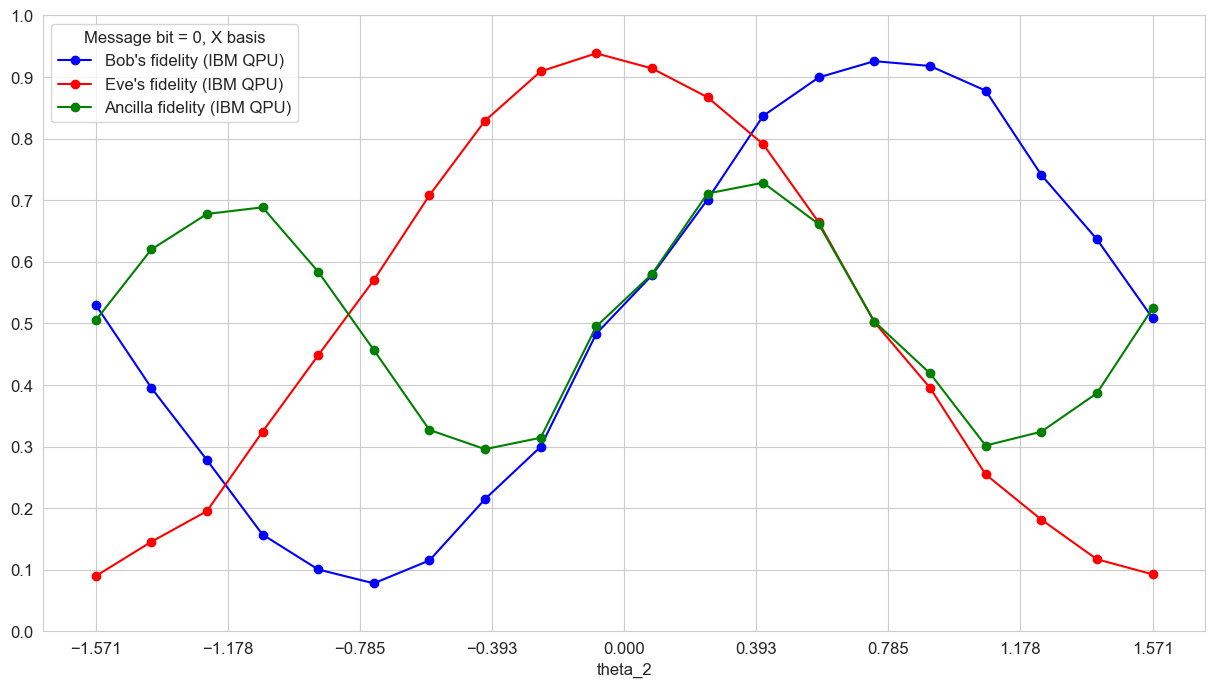

(array([0.53027344, 0.39550781, 0.27832031, 0.15722656, 0.10058594,
        0.078125  , 0.11523438, 0.21484375, 0.29980469, 0.48339844,
        0.578125  , 0.70117188, 0.83691406, 0.89941406, 0.92578125,
        0.91796875, 0.87792969, 0.74121094, 0.63671875, 0.50878906]),
 array([0.08984375, 0.14550781, 0.1953125 , 0.32421875, 0.44824219,
        0.5703125 , 0.70800781, 0.82910156, 0.90917969, 0.93847656,
        0.9140625 , 0.8671875 , 0.79101562, 0.6640625 , 0.50195312,
        0.39550781, 0.25488281, 0.18164062, 0.1171875 , 0.09277344]),
 array([0.50488281, 0.62011719, 0.67773438, 0.68847656, 0.58398438,
        0.45703125, 0.32714844, 0.29589844, 0.31445312, 0.49511719,
        0.58007812, 0.7109375 , 0.72851562, 0.66113281, 0.50292969,
        0.41894531, 0.30175781, 0.32421875, 0.38671875, 0.52441406]),
 array([-1.57079633, -1.40544935, -1.24010236, -1.07475538, -0.9094084 ,
        -0.74406142, -0.57871444, -0.41336745, -0.24802047, -0.08267349,
         0.08267349,  0.24802047

In [33]:
plot_fidelities(job_ids = X0_job_ids, gateset = 'qiskit', backend = 'ibmq_lima')

## Now let's take a look at Alice sending 1 with the X Basis

In [12]:
#store job_ids
X1_job_ids = []

We will use 'ibmq-lima', as with 0. Should still be saved in `backend`.

In [13]:
backend 

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

Remember, we can only run 5 jobs at a time.

In [14]:
for j in range(5):
    qc_X1, job_id_X1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit',
                                                    bitval = 1, 
                                                    backend = backend)
    #add test to our list
    X1_job_ids.append(job_id_X1)

ibmqfactory.load_account:WARNING:2023-02-24 13:07:56,256: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:08:01,098: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:08:05,041: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:08:08,862: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:08:13,713: Credentials are already in use. The existing account in the session will be replaced.


In [15]:
#next 5
for j in range(5, 10):
    qc_X1, job_id_X1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit',
                                                    bitval = 1, 
                                                    backend = backend)
    #add test to our list
    X1_job_ids.append(job_id_X1)

ibmqfactory.load_account:WARNING:2023-02-24 13:10:20,982: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:10:24,967: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:10:29,729: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:10:33,518: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:10:37,322: Credentials are already in use. The existing account in the session will be replaced.


In [16]:
#next 5
for j in range(10, 15):
    qc_X1, job_id_X1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit',
                                                    bitval = 1, 
                                                    backend = backend)
    #add test to our list
    X1_job_ids.append(job_id_X1)

ibmqfactory.load_account:WARNING:2023-02-24 13:11:31,601: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:11:35,640: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:11:40,420: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:11:43,936: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:11:47,628: Credentials are already in use. The existing account in the session will be replaced.


In [17]:
#last 5
for j in range(15, 20):
    qc_X1, job_id_X1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit',
                                                    bitval = 1, 
                                                    backend = backend)
    #add test to our list
    X1_job_ids.append(job_id_X1)

ibmqfactory.load_account:WARNING:2023-02-24 13:22:56,638: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:23:00,603: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:23:04,919: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:23:09,185: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:23:12,946: Credentials are already in use. The existing account in the session will be replaced.


63f3c23c87dd66904179f9ad',

### Plot the Fidelities for Sending 1 in the $X$ Basis

ibmqfactory.load_account:WARNING:2023-02-24 14:16:36,097: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:16:41,201: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:16:44,533: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:16:48,034: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:16:52,272: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:16:56,064: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:16:59,406: Credentials are already in use. The existing account in the session will be re

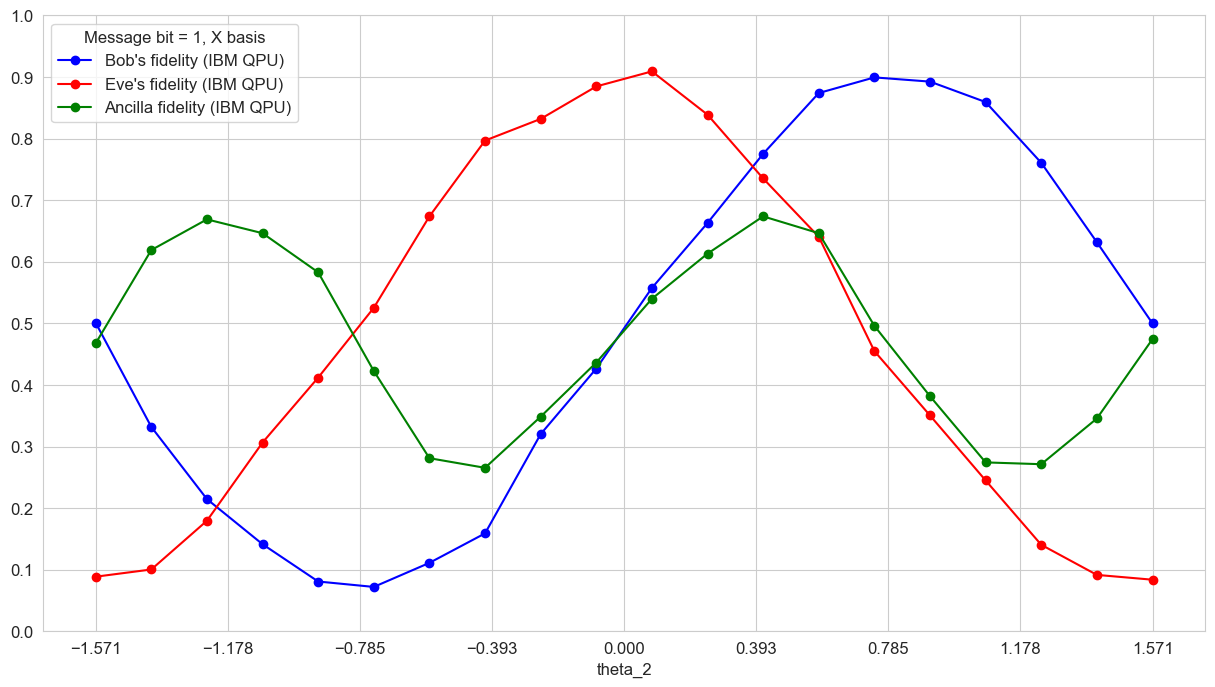

(array([0.50097656, 0.33203125, 0.21484375, 0.14160156, 0.08105469,
        0.07226562, 0.11132812, 0.15917969, 0.3203125 , 0.42675781,
        0.55761719, 0.66308594, 0.77539062, 0.87402344, 0.89941406,
        0.89257812, 0.859375  , 0.76074219, 0.63183594, 0.5       ]),
 array([0.08886719, 0.10058594, 0.1796875 , 0.30664062, 0.41210938,
        0.52539062, 0.67382812, 0.796875  , 0.83203125, 0.88476562,
        0.90917969, 0.83886719, 0.73535156, 0.640625  , 0.45507812,
        0.35058594, 0.24511719, 0.140625  , 0.09179688, 0.08398438]),
 array([0.46777344, 0.61914062, 0.66894531, 0.64648438, 0.58300781,
        0.42285156, 0.28125   , 0.265625  , 0.34863281, 0.43652344,
        0.54003906, 0.61328125, 0.67382812, 0.64648438, 0.49609375,
        0.38183594, 0.27441406, 0.27148438, 0.34570312, 0.47460938]),
 array([-1.57079633, -1.40544935, -1.24010236, -1.07475538, -0.9094084 ,
        -0.74406142, -0.57871444, -0.41336745, -0.24802047, -0.08267349,
         0.08267349,  0.24802047

In [34]:
plot_fidelities(job_ids = X1_job_ids, gateset = 'qiskit', alice_bit = 1, backend = backend)

## Let's see how things look in the $Y$ Basis

First, we'll check $Y$ basis with Alice sending 0.

In [19]:
#create a holder for our job ids
Y0_job_ids = []

In [20]:
basis = 'Y'

In [21]:
#run first 5
for j in range(5):
    qc_Y0, job_id_Y0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    backend = backend)
    #add test to our list
    Y0_job_ids.append(job_id_Y0)

ibmqfactory.load_account:WARNING:2023-02-24 13:34:38,680: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:34:43,765: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:34:48,136: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:34:51,564: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:34:56,037: Credentials are already in use. The existing account in the session will be replaced.


In [22]:
#run next 5
for j in range(5, 10):
    qc_Y0, job_id_Y0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    backend = backend)
    #add test to our list
    Y0_job_ids.append(job_id_Y0)

ibmqfactory.load_account:WARNING:2023-02-24 13:39:21,038: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:39:24,590: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:39:28,434: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:39:33,765: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:39:47,339: Credentials are already in use. The existing account in the session will be replaced.


In [23]:
#run next 5
for j in range(10, 15):
    qc_Y0, job_id_Y0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    backend = backend)
    #add test to our list
    Y0_job_ids.append(job_id_Y0)

ibmqfactory.load_account:WARNING:2023-02-24 13:45:15,256: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:45:18,742: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:45:22,708: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:45:28,067: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:45:48,713: Credentials are already in use. The existing account in the session will be replaced.


In [24]:
#run last 5
for j in range(15, 20):
    qc_Y0, job_id_Y0, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    backend = backend)
    #add test to our list
    Y0_job_ids.append(job_id_Y0)

ibmqfactory.load_account:WARNING:2023-02-24 13:48:27,220: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:48:31,283: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:48:35,428: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:48:40,180: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:48:43,881: Credentials are already in use. The existing account in the session will be replaced.


### Plot the Fidelities for the $Y$ basis sending 0.

ibmqfactory.load_account:WARNING:2023-02-24 14:17:54,215: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:17:58,473: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:18:03,116: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:18:06,378: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:18:10,065: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:18:14,407: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:18:17,969: Credentials are already in use. The existing account in the session will be re

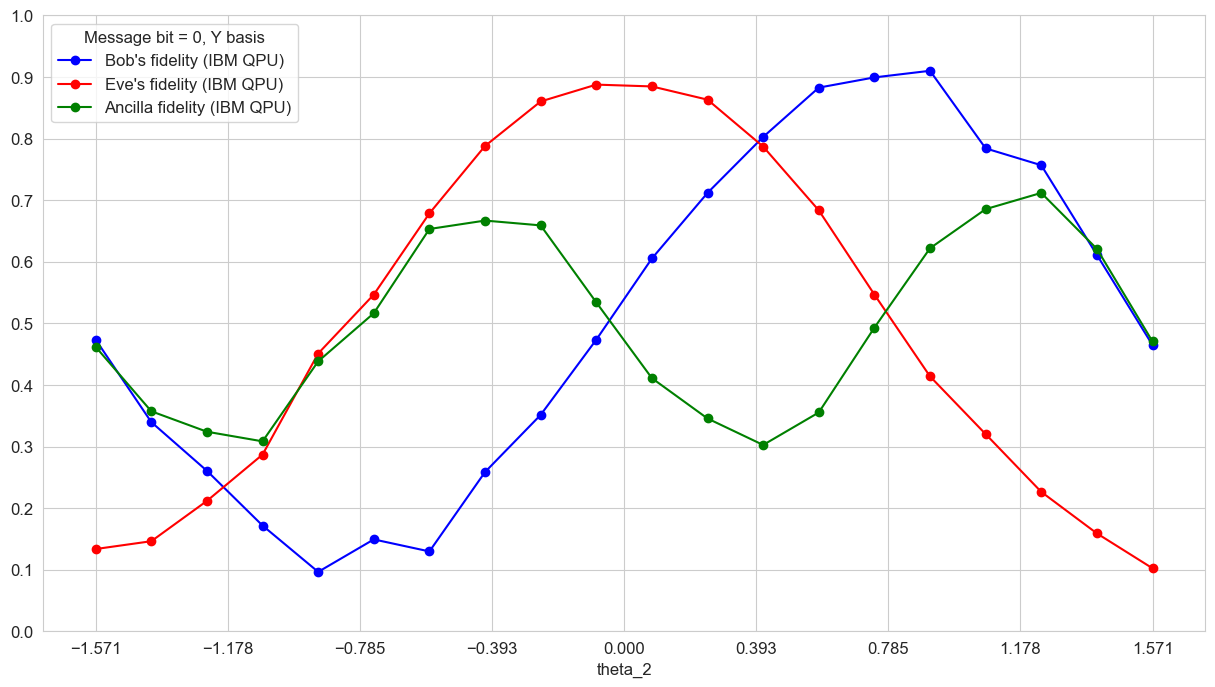

(array([0.47363281, 0.33984375, 0.26074219, 0.171875  , 0.09667969,
        0.14941406, 0.12988281, 0.25878906, 0.3515625 , 0.47363281,
        0.60546875, 0.71191406, 0.80273438, 0.8828125 , 0.89941406,
        0.91015625, 0.78417969, 0.75683594, 0.61132812, 0.46484375]),
 array([0.13378906, 0.14648438, 0.21191406, 0.28710938, 0.45117188,
        0.546875  , 0.67871094, 0.78808594, 0.86035156, 0.88769531,
        0.88476562, 0.86328125, 0.78710938, 0.68359375, 0.546875  ,
        0.4140625 , 0.3203125 , 0.2265625 , 0.15917969, 0.10253906]),
 array([0.46191406, 0.35742188, 0.32421875, 0.30859375, 0.43847656,
        0.51660156, 0.65332031, 0.66699219, 0.65917969, 0.53417969,
        0.41113281, 0.34570312, 0.30273438, 0.35546875, 0.49316406,
        0.62207031, 0.68554688, 0.71191406, 0.62109375, 0.47070312]),
 array([-1.57079633, -1.40544935, -1.24010236, -1.07475538, -0.9094084 ,
        -0.74406142, -0.57871444, -0.41336745, -0.24802047, -0.08267349,
         0.08267349,  0.24802047

In [35]:
plot_fidelities(job_ids = Y0_job_ids, basis = basis, gateset = 'qiskit', backend = backend)

### Now we check sending 1 in the $Y$ basis

In [26]:
#create a holder for our job ids
Y1_job_ids = []

In [27]:
#run first 5
for j in range(5):
    qc_Y1, job_id_Y1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    bitval = 1,
                                                    backend = backend)
    #add test to our list
    Y1_job_ids.append(job_id_Y1)

ibmqfactory.load_account:WARNING:2023-02-24 13:54:24,038: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:54:28,347: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:54:32,495: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:54:36,587: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:54:41,269: Credentials are already in use. The existing account in the session will be replaced.


In [28]:
#run next 5
for j in range(5, 10):
    qc_Y1, job_id_Y1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    bitval = 1,
                                                    backend = backend)
    #add test to our list
    Y1_job_ids.append(job_id_Y1)

ibmqfactory.load_account:WARNING:2023-02-24 13:57:08,302: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:57:13,107: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:57:18,353: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:57:24,390: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:57:28,316: Credentials are already in use. The existing account in the session will be replaced.


In [29]:
#run next 5
for j in range(10, 15):
    qc_Y1, job_id_Y1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    bitval = 1,
                                                    backend = backend)
    #add test to our list
    Y1_job_ids.append(job_id_Y1)

ibmqfactory.load_account:WARNING:2023-02-24 13:59:16,856: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:59:21,051: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:59:30,227: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:59:34,489: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 13:59:39,697: Credentials are already in use. The existing account in the session will be replaced.


In [30]:
#run last 5
for j in range(15, 20):
    qc_Y1, job_id_Y1, backend = run_experiment_ibm(ts[j], 
                                                    gateset = 'qiskit',
                                                    basis_send = basis,
                                                    basis_measure = basis, 
                                                    bitval = 1,
                                                    backend = backend)
    #add test to our list
    Y1_job_ids.append(job_id_Y1)

ibmqfactory.load_account:WARNING:2023-02-24 14:02:17,787: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:02:30,860: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:02:35,437: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:02:39,521: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:02:43,357: Credentials are already in use. The existing account in the session will be replaced.


### Plot the results of sending 1 in the $Y$ basis

ibmqfactory.load_account:WARNING:2023-02-24 14:36:10,990: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:36:16,666: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:36:20,956: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:36:25,081: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:36:31,156: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:36:35,054: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-02-24 14:36:39,566: Credentials are already in use. The existing account in the session will be re

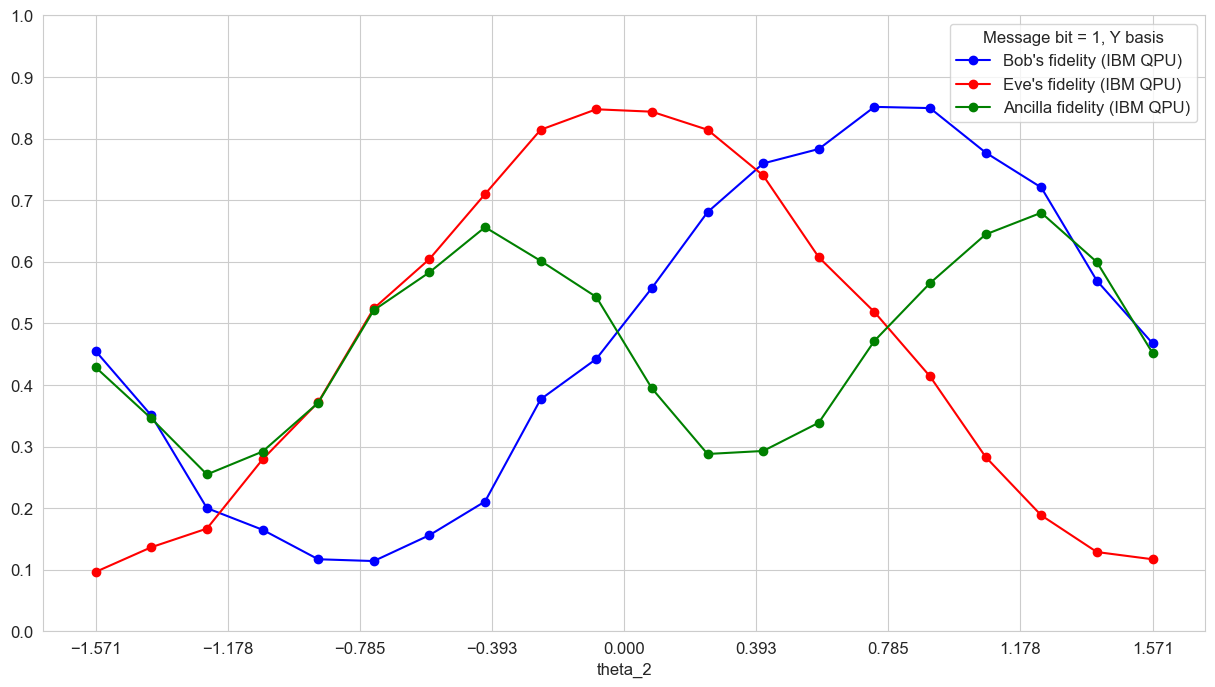

(array([0.45507812, 0.35058594, 0.20019531, 0.16503906, 0.1171875 ,
        0.11425781, 0.15625   , 0.2109375 , 0.37695312, 0.44238281,
        0.55761719, 0.68066406, 0.75976562, 0.78320312, 0.8515625 ,
        0.84960938, 0.77734375, 0.72070312, 0.56933594, 0.46777344]),
 array([0.09667969, 0.13671875, 0.16699219, 0.27929688, 0.37207031,
        0.52441406, 0.60449219, 0.70996094, 0.81445312, 0.84765625,
        0.84375   , 0.81445312, 0.74023438, 0.60742188, 0.51855469,
        0.4140625 , 0.28320312, 0.18847656, 0.12890625, 0.1171875 ]),
 array([0.42871094, 0.34570312, 0.25488281, 0.29199219, 0.37109375,
        0.52148438, 0.58300781, 0.65625   , 0.6015625 , 0.54296875,
        0.39453125, 0.28808594, 0.29296875, 0.33886719, 0.47167969,
        0.56542969, 0.64453125, 0.6796875 , 0.59960938, 0.45214844]),
 array([-1.57079633, -1.40544935, -1.24010236, -1.07475538, -0.9094084 ,
        -0.74406142, -0.57871444, -0.41336745, -0.24802047, -0.08267349,
         0.08267349,  0.24802047

In [36]:
plot_fidelities(job_ids = Y1_job_ids, basis = basis, gateset = 'qiskit', alice_bit = 1, backend = backend)